In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#plt.style.use('seaborn-deep')

In [4]:
filename = '/content/drive/Othercomputers/My Laptop/sales_predictions/sales_predictions.csv'

In [5]:
#Import a csv file
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
#Replace missing values in Item Weight column with the mean of the population
df.loc[df['Item_Weight'].isna(), 'Item_Weight'] = df.loc[df['Item_Weight'].isna(), 'Item_Weight'].fillna(df['Item_Weight'].mean())

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
df['Item_Weight'].value_counts()

12.857645    1463
12.150000      86
17.600000      82
13.650000      77
11.800000      76
             ... 
7.560000        2
9.420000        1
5.400000        1
6.520000        1
7.685000        1
Name: Item_Weight, Length: 416, dtype: int64

In [10]:
#Content conscious customers
#might purchase based on this description, plus field can be converted into 0 
#for regular and 1 for Low Fat. Arriving at two values for this column is a 
#good thing
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [11]:
#Performing the replace on the improper category descriptions
df.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [12]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [13]:
#Checking the Item Type for any necessary category item cleanup
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [14]:
df.groupby(['Outlet_Location_Type','Outlet_Type','Outlet_Size'],dropna=False,as_index=False)[['Item_Identifier']].count()

,Outlet_Location_Type,Outlet_Type,Outlet_Size,Item_Identifier
0,Tier 1,Grocery Store,Small,528
1,Tier 1,Supermarket Type1,Medium,930
2,Tier 1,Supermarket Type1,Small,930
3,Tier 2,Supermarket Type1,Small,930
4,Tier 2,Supermarket Type1,NaN,1855
5,Tier 3,Grocery Store,NaN,555
6,Tier 3,Supermarket Type1,High,932
7,Tier 3,Supermarket Type2,Medium,928
8,Tier 3,Supermarket Type3,Medium,935


In [15]:
df[df['Outlet_Size'].isna()].describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,2410,2410.000000,2410,2410.000000,2410,2410.000000,2410,2410.000000,0,2410,2410,2410.000000
unique,1393,NaN,2,NaN,16,NaN,3,NaN,0,2,2,NaN
top,FDF16,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT045,NaN,NaN,Tier 2,Supermarket Type1,NaN
freq,3,NaN,1562,NaN,349,NaN,929,NaN,NaN,1855,1855,NaN
mean,NaN,12.778479,NaN,0.070259,NaN,140.322946,NaN,2003.000000,NaN,NaN,NaN,1822.626947
std,NaN,4.589825,NaN,0.055029,NaN,62.397904,NaN,3.506502,NaN,NaN,NaN,1557.858015
min,NaN,4.590000,NaN,0.000000,NaN,32.090000,NaN,1998.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.785000,NaN,0.028744,NaN,93.096200,NaN,2002.000000,NaN,NaN,NaN,554.777850
50%,NaN,12.600000,NaN,0.056414,NaN,142.165400,NaN,2002.000000,NaN,NaN,NaN,1443.454400
75%,NaN,16.700000,NaN,0.100364,NaN,185.135800,NaN,2007.000000,NaN,NaN,NaN,2681.509500


#My best judgement is to set the missing values for the Outlet Type to small based on the analyis using GroupBy and Describe methods

In [16]:
df.loc[df['Outlet_Size'].isna(), 'Outlet_Size'] = df.loc[df['Outlet_Size'].isna(), 'Outlet_Size'].fillna("Small")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#First Checkpoint
##Checkpoint is provided just before performing removal of any duplicate rows

In [18]:
df1_copy = df

In [19]:
df.shape

(8523, 12)

In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


In [22]:
df.shape

(8523, 12)

#Appears there are no duplicates in the dataframe; record counts did not change after the drop duplicates step

# Start of Data Visualization Section - Checkpoint 2

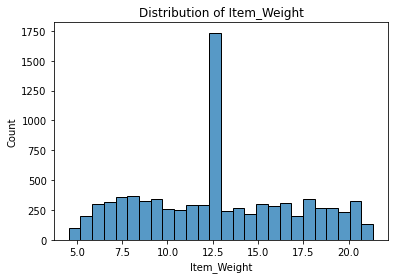

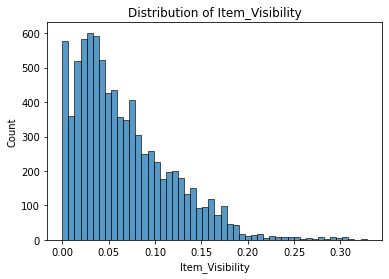

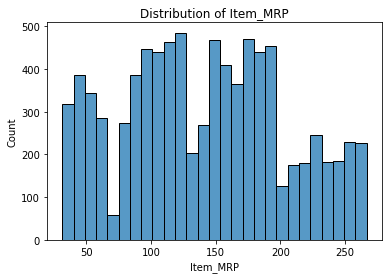

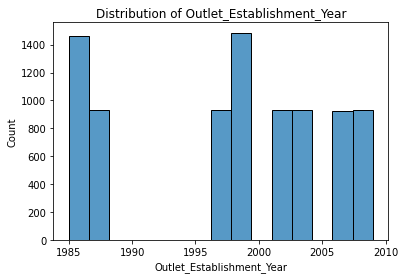

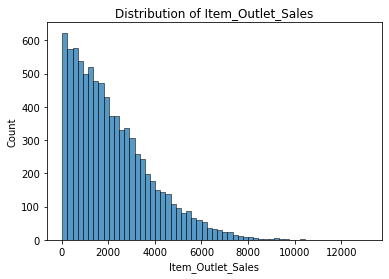

In [23]:
sp_features_list = ['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']
for i in sp_features_list:
    sns_histplt = sns.histplot(data=df, x=i)
    sns_histplt.set_title("Distribution of {}".format(i));
    plt.show()

In [24]:
df_Item_Type_Count = df.groupby(['Item_Type'],as_index=False)[['Item_Outlet_Sales']].count()
df_Item_Type_Sum = df.groupby(['Item_Type'],as_index=False)[['Item_Outlet_Sales']].sum()

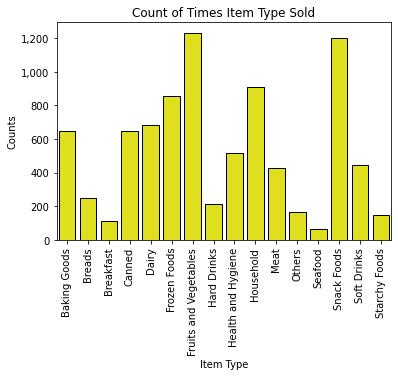

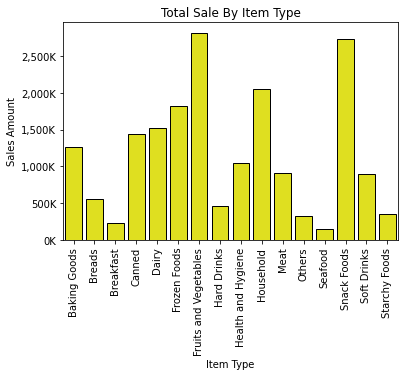

In [25]:
sns_barplt = sns.barplot(data=df_Item_Type_Count,x='Item_Type',y='Item_Outlet_Sales',color='yellow',edgecolor='black');
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
sns_barplt.set(ylabel='Counts')
plt.xticks(rotation=90);
plt.title("Count of Times Item Type Sold")
plt.xlabel("Item Type")

plt.show()

sns_barplt2 = sns.barplot(data=df_Item_Type_Sum,x='Item_Type',y='Item_Outlet_Sales',color='yellow',edgecolor='black');
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
sns_barplt2.set(ylabel='Sales Amount')
y_ax_labels = ['{:,.0f}'.format(x) + 'K' for x in sns_barplt2.get_yticks()/1000]
sns_barplt2.set_yticklabels(y_ax_labels)
plt.xticks(rotation=90);
plt.title("Total Sale By Item Type")
plt.xlabel("Item Type")
plt.show()

In [26]:
df_Item_Type_Count = df.groupby(['Item_Type','Outlet_Size'],as_index=False)[['Item_Outlet_Sales']].count()
df_Item_Type_Sum = df.groupby(['Item_Type','Outlet_Size'],as_index=False)[['Item_Outlet_Sales']].sum()

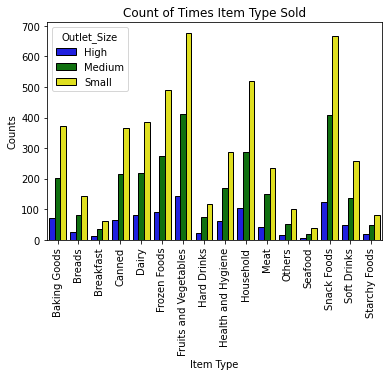

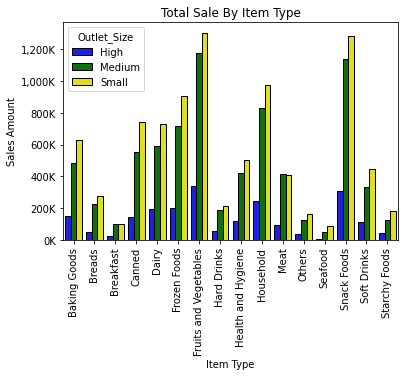

In [27]:
sns_barplt = sns.barplot(data=df_Item_Type_Count,x='Item_Type',y='Item_Outlet_Sales',hue='Outlet_Size',palette=['blue','green','yellow'],edgecolor='black');
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
sns_barplt.set(ylabel='Counts')
plt.xticks(rotation=90);
plt.title("Count of Times Item Type Sold")
plt.xlabel("Item Type")
plt.show()

sns_barplt2 = sns.barplot(data=df_Item_Type_Sum,x='Item_Type',y='Item_Outlet_Sales',hue='Outlet_Size',palette=['blue','green','yellow'],edgecolor='black');
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
sns_barplt2.set(ylabel='Sales Amount')
y_ax_labels = ['{:,.0f}'.format(x) + 'K' for x in sns_barplt2.get_yticks()/1000]
sns_barplt2.set_yticklabels(y_ax_labels)
plt.xticks(rotation=90);
plt.title("Total Sale By Item Type")
plt.xlabel("Item Type")
plt.show()

In [28]:
df_Outlet_Location_Type_Count = df.groupby(['Outlet_Location_Type','Outlet_Type'],as_index=False)[['Item_Outlet_Sales']].count()
df_Outlet_Location_Type_Sum = df.groupby(['Outlet_Location_Type','Outlet_Type'],as_index=False)[['Item_Outlet_Sales']].sum()

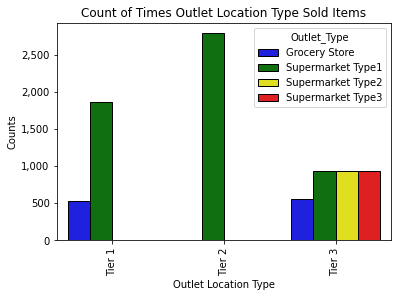

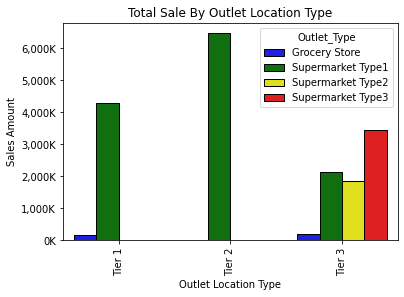

In [29]:
sns_barplt = sns.barplot(data=df_Outlet_Location_Type_Count,x='Outlet_Location_Type',y='Item_Outlet_Sales',hue='Outlet_Type',palette=['blue','green','yellow','red'],edgecolor='black');
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
sns_barplt.set(ylabel='Counts')
plt.xticks(rotation=90);
plt.title("Count of Times Outlet Location Type Sold Items")
plt.xlabel("Outlet Location Type")
plt.show()

sns_barplt2 = sns.barplot(data=df_Outlet_Location_Type_Sum,x='Outlet_Location_Type',y='Item_Outlet_Sales',hue='Outlet_Type',palette=['blue','green','yellow','red'],edgecolor='black');
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
sns_barplt2.set(ylabel='Sales Amount')
y_ax_labels = ['{:,.0f}'.format(x) + 'K' for x in sns_barplt2.get_yticks()/1000]
sns_barplt2.set_yticklabels(y_ax_labels)
plt.xticks(rotation=90);
plt.title("Total Sale By Outlet Location Type")
plt.xlabel("Outlet Location Type")
plt.show()

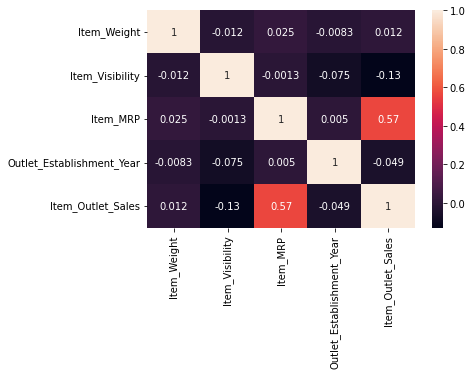

In [30]:
sns_heatmap = sns.heatmap(df.corr(),annot=True)

In [31]:
df_LocType_SalesSum = df.groupby(['Outlet_Location_Type'],as_index=False)[['Item_Outlet_Sales']].sum()
df_OutType_SalesSum = df.groupby(['Outlet_Type'],as_index=False)[['Item_Outlet_Sales']].sum()
df_combo_SalesSum = df.groupby(['Outlet_Type','Outlet_Location_Type'],as_index=False)[['Item_Outlet_Sales']].sum()
df_FatCon_OutType_SalesSum = df.groupby(['Outlet_Type','Item_Fat_Content'],as_index=False)[['Item_Outlet_Sales']].sum()

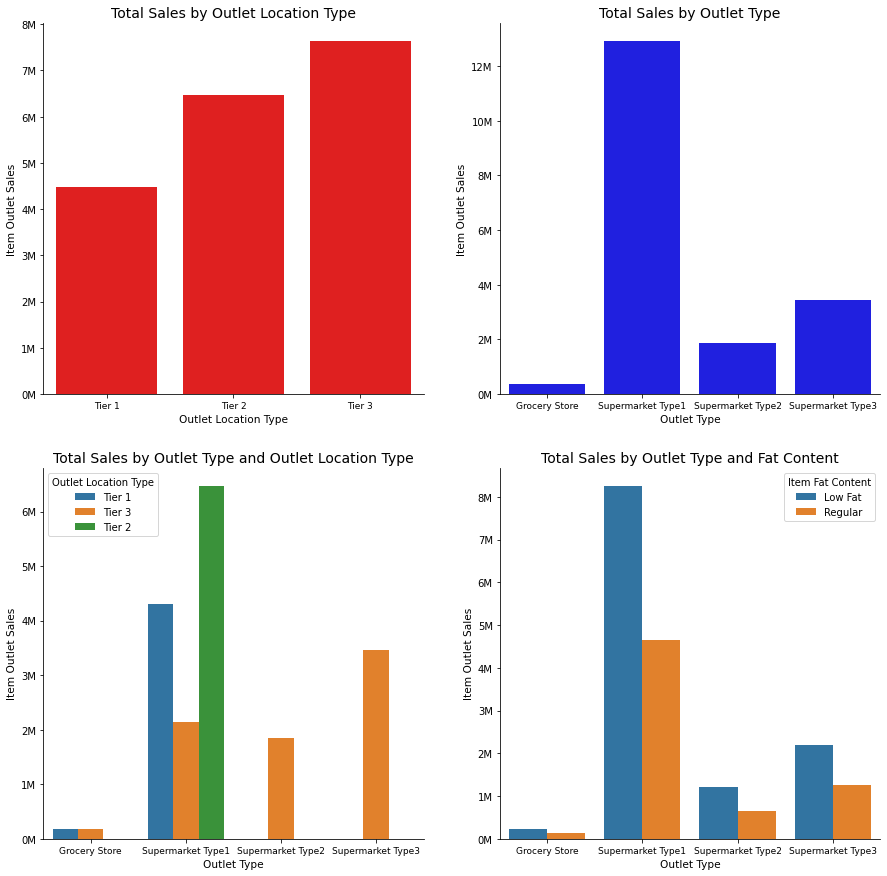

In [74]:
nrows = 2
ncols = 2
xTickSize = 9
pltTitles = ['Total Sales by Outlet Location Type','Total Sales by Outlet Type','Total Sales by Outlet Type and Outlet Location Type','Total Sales by Outlet Type and Fat Content']
fig, axs = plt.subplots(nrows=nrows,ncols=ncols,figsize=(15,15))

sns_barplt1 = sns.barplot(data=df_LocType_SalesSum,x='Outlet_Location_Type',y='Item_Outlet_Sales',palette=['red'],ax=axs[0][0]);
y_ax_labels = ['{:,.0f}'.format(x) + 'M' for x in sns_barplt1.get_yticks()/10**6]
sns_barplt1.set_yticklabels(y_ax_labels)
sns_barplt1.set_xlabel("Outlet Location Type",fontsize=10.5)
sns_barplt1.set_xticklabels(labels=df_LocType_SalesSum['Outlet_Location_Type'].unique(),fontsize=xTickSize)

sns_barplt2 = sns.barplot(data=df_OutType_SalesSum,x='Outlet_Type',y='Item_Outlet_Sales',palette=['blue'],ax=axs[0][1]);
y_ax_labels = ['{:,.0f}'.format(x) + 'M' for x in sns_barplt2.get_yticks()/10**6]
sns_barplt2.set_yticklabels(y_ax_labels)
sns_barplt2.set_xlabel("Outlet Type",fontsize=10.5)
sns_barplt2.set_xticklabels(labels=df_OutType_SalesSum['Outlet_Type'].unique(),fontsize=xTickSize)

sns_barplt3 = sns.barplot(data=df_combo_SalesSum,x='Outlet_Type',y='Item_Outlet_Sales',hue='Outlet_Location_Type',ax=axs[1][0]);
sns_barplt3.legend(title='Outlet Location Type')
y_ax_labels = ['{:,.0f}'.format(x) + 'M' for x in sns_barplt3.get_yticks()/10**6]
sns_barplt3.set_yticklabels(y_ax_labels)
sns_barplt3.set_xlabel("Outlet Type",fontsize=10.5)
sns_barplt3.set_xticklabels(labels=df_combo_SalesSum['Outlet_Type'].unique(),fontsize=xTickSize)

sns_barplt4 = sns.barplot(data=df_FatCon_OutType_SalesSum,x='Outlet_Type',y='Item_Outlet_Sales',hue='Item_Fat_Content',ax=axs[1][1]);
sns_barplt4.legend(title='Item Fat Content')
y_ax_labels = ['{:,.0f}'.format(x) + 'M' for x in sns_barplt4.get_yticks()/10**6]
sns_barplt4.set_yticklabels(y_ax_labels)
sns_barplt4.set_xlabel("Outlet Type",fontsize=10.5)
sns_barplt4.set_xticklabels(labels=df_FatCon_OutType_SalesSum['Outlet_Type'].unique(),fontsize=xTickSize)

x = 0
for i in range(0,nrows):
    for j in range(0,ncols):
        axs[i][j].spines['right'].set_visible(False)
        axs[i][j].spines['top'].set_visible(False)
        axs[i][j].set_ylabel("Item Outlet Sales",fontsize=10.5)
        axs[i][j].set_title(pltTitles[x],fontsize=14)
        x += 1
fig.show()


#Key findings on Store sales data
###Supermarket Type1 needs to be provided with the resources to generate more sales particularly with moving both low fat and regular items.
###Supermarket Type1 in all outlet location types is a strong perform, more information is needed to better understand why Supermarket Type1 is performing so much better than the other outlet types. It is possible that Supermarket Type1 may be high volume or high traffic or longer period of time in existence.
###Supermarket Type1 also had more regular content items than all the other outlet types combined.
###It appears the sales from Grocery stores is not expected to drive overall sales in the near future.

In [ ]:
#Key findings on Store sales data
